<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/Titanic_121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.drop(["PassengerId","SibSp","Name"], axis=1, inplace=True)

In [ ]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Parch,0
Ticket,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"].copy()

In [ ]:
X

,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,0,113803,53.1000,C123,S
4,3,male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,112053,30.0000,B42,S
888,3,female,NaN,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,111369,30.0000,C148,C


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
cat_features = X_train.select_dtypes(exclude = np.number).columns
num_features = X_train.select_dtypes(include = np.number).columns

In [ ]:
cat_features,num_features

(Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'),
 Index(['Pclass', 'Age', 'Parch', 'Fare'], dtype='object'))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
cat_pipeline = Pipeline ([
    ('imputer',SimpleImputer(strategy='constant', fill_value = 'Missing')),
    ('onehotencoder',OneHotEncoder(handle_unknown='ignore', sparse_output= False))
])

num_pipeline = Pipeline ([
    ('imputer',SimpleImputer(strategy='mean')),
    ('standardscaler',StandardScaler())
])

transformer = ColumnTransformer([
    ('cat',cat_pipeline,cat_features),
    ('num',num_pipeline,num_features)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
pd.DataFrame(X_train_transformed)

column_names = transformer.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed,
                                   columns = column_names)
X_test_transformed = transformer.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed,
                                  columns = column_names)

In [ ]:
X_train_transformed

,cat__Sex_female,cat__Sex_male,cat__Ticket_110152,cat__Ticket_110413,cat__Ticket_110465,cat__Ticket_110813,cat__Ticket_111240,cat__Ticket_111320,cat__Ticket_111361,cat__Ticket_111426,...,cat__Cabin_Missing,cat__Cabin_T,cat__Embarked_C,cat__Embarked_Missing,cat__Embarked_Q,cat__Embarked_S,num__Pclass,num__Age,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.829242,-2.586995e-01,-0.475478,-0.460169
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.829242,5.049168e-01,-0.475478,-0.475168
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.373243,5.049168e-01,-0.475478,-0.375310
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.575728,6.576401e-01,-0.475478,0.764937
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.373243,-1.059763e-01,-0.475478,-0.424220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.829242,-7.168694e-01,-0.475478,-0.475982
708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.575728,1.192172e+00,-0.475478,-0.110220
709,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.575728,5.049168e-01,-0.475478,0.155360
710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.575728,1.497618e+00,-0.475478,0.484116


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_transformed,y_train)
lg.score(X_test_transformed,y_test)



0.7932960893854749

<Axes: >

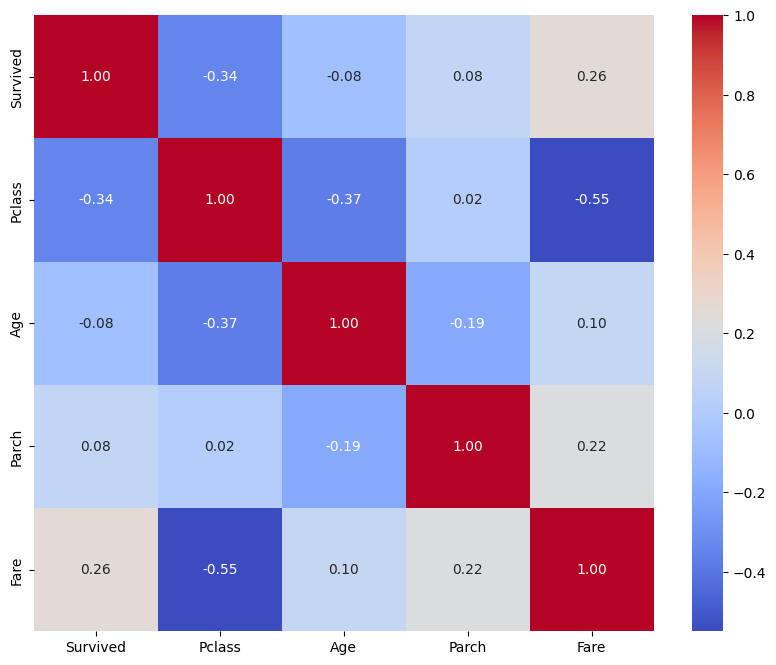

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_titanic = titanic.select_dtypes(include='number')

corr_matrix = numeric_titanic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
